In [ ]:
# class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', 
#                                              algorithm='auto', leaf_size=30, p=2,  
#                                              metric='minkowski', metric_params=None, 
#                                              n_jobs=None)[source]

#use n_neighbors=[5,10,15,20], 
 #       weights=['uniform','distance']
  #       p=[1,2]

**Step-1 : Read the data**

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df=pd.read_csv('preprocessd_data.csv')
df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,0,-0.264643,-0.946659,0,0,-1.508785,0.722258,-0.944404,-1.403000,-0.415473,0
1,0,0.029654,1.235009,0,0,0.304821,-0.901748,-0.688523,-0.599124,0.347522,0
2,0,2.580235,0.658246,0,0,-2.266627,0.613991,-0.483818,-1.403000,2.636507,1
3,0,-1.441834,0.783629,0,1,0.638123,-0.252146,0.079121,-0.197185,1.110517,0
4,0,0.127754,2.288228,0,0,-0.333851,0.253101,-0.893228,1.008630,-0.415473,0
...,...,...,...,...,...,...,...,...,...,...,...
3401,1,-0.805656,0.479710,0,0,0.887802,0.552184,0.865765,-0.495634,-0.415473,1
3402,0,0.477826,0.674425,0,0,2.038061,-0.931071,0.567257,2.100185,0.235227,1
3403,0,-0.550521,0.426099,0,1,-0.410669,0.344847,-0.729485,-0.403904,1.873512,1
3404,0,0.004651,-0.444637,0,0,1.359751,-0.847121,-0.715010,-0.197185,-1.178468,1


**Step-2 : Split into X(input columns) and y(output column)**

In [40]:
X=df.drop('churn',axis=1)
y=df['churn']

**Step-3 : Train-Test-Split**

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Step-4 : Develop Base Model(Without fitting data)**

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn                           # base model

KNeighborsClassifier()

**Step-5 : Get Model Parameters**

In [44]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**Step-6 : Make the parameters file**

In [45]:
param_grid={'n_neighbors': [5,10,15,20],    #4
            'p': [1,2],                     #2
            'weights': ['uniform','distance']}#2

# 4*2*2=16

**Step-7 : Take GriDsearch pass the arguments of $step-6$**

In [46]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_search=GridSearchCV(knn, #base model
                        param_grid, # param
                        scoring='accuracy',# metric
                        cv=5,
                        verbose=True)

In [47]:
grid_search

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 20], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=True)

**Step-8 : Fit the data in grid search**

In [15]:
import time
start=time.time()
grid_search.fit(X_train,y_train)
end=time.time()
print('Total time taken is:',(end-start))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Total time taken is: 5.153520822525024


In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2724, 10), (682, 10), (2724,), (682,))

**Step-9 : Get below 3 from grid search`**

- 1. Best score
- 2. Best estimator
- 3. Get best parameters

In [14]:
dir(grid_search)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'classes_',
 'cv',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'n_features_in_',
 'n_jobs',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_pr

In [22]:
grid_search.best_score_

0.8887695628710199

In [24]:
grid_search.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [28]:
best_model=grid_search.best_estimator_
best_model

KNeighborsClassifier(p=1, weights='distance')

In [29]:
grid_search.cv_results_

{'mean_fit_time': array([0.01393828, 0.00789347, 0.01394958, 0.00799217, 0.00880365,
        0.00696507, 0.0069766 , 0.00719833, 0.00679379, 0.00792432,
        0.00639625, 0.00757709, 0.00678978, 0.00671177, 0.00656939,
        0.00756736]),
 'std_fit_time': array([0.01121549, 0.00260149, 0.0119701 , 0.00064194, 0.00135612,
        0.00107733, 0.00087418, 0.00116662, 0.00040618, 0.00136715,
        0.00046208, 0.00150392, 0.00073571, 0.00062467, 0.00047763,
        0.0022429 ]),
 'mean_score_time': array([0.07781262, 0.02805367, 0.07293124, 0.02901359, 0.08498631,
        0.03079977, 0.07163997, 0.03151994, 0.0764585 , 0.03949766,
        0.07404695, 0.03476768, 0.07824583, 0.03865409, 0.07907548,
        0.03912597]),
 'std_score_time': array([0.01115739, 0.00297026, 0.00939498, 0.00269285, 0.00736919,
        0.00091948, 0.00938192, 0.00384357, 0.00496118, 0.00314848,
        0.0023697 , 0.00292252, 0.00536641, 0.00368824, 0.00551243,
        0.00345199]),
 'param_n_neighbors': mask

In [30]:
c1=grid_search.cv_results_['split0_test_score']
c2=grid_search.cv_results_['split1_test_score']
c3=grid_search.cv_results_['split2_test_score']
c4=grid_search.cv_results_['split3_test_score']
c5=grid_search.cv_results_['split4_test_score']
mean_score=grid_search.cv_results_['mean_test_score']
df=pd.DataFrame(zip(c1,c2,c3,c4,c5,mean_score),
             columns=['C1','C2','C3','C4','C5','mean_test_score'],
             index=grid_search.cv_results_['params'])

avg=[sum(i[:-1])/5 for i in df.values]
max(avg)
df['Average']=avg
df

,C1,C2,C3,C4,C5,mean_test_score,Average
"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",0.882569,0.877064,0.878899,0.875229,0.884191,0.879591,0.879591
"{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",0.891743,0.888073,0.886239,0.880734,0.897059,0.888770,0.888770
"{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",0.867890,0.866055,0.856881,0.849541,0.867647,0.861603,0.861603
"{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}",0.880734,0.873394,0.862385,0.855046,0.873162,0.868944,0.868944
"{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",0.877064,0.889908,0.864220,0.877064,0.886029,0.878857,0.878857
"{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}",0.884404,0.886239,0.877064,0.877064,0.889706,0.882895,0.882895
"{'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}",0.884404,0.871560,0.862385,0.873394,0.863971,0.871143,0.871143
"{'n_neighbors': 10, 'p': 2, 'weights': 'distance'}",0.871560,0.875229,0.864220,0.866055,0.871324,0.869678,0.869678
"{'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}",0.860550,0.867890,0.845872,0.856881,0.875000,0.861239,0.861239
"{'n_neighbors': 15, 'p': 1, 'weights': 'distance'}",0.869725,0.884404,0.875229,0.877064,0.893382,0.879961,0.879961


**step-10 : use best estimator to predict predictions on X_test**

- you will get y_test and y_pred

In [48]:
y_pred=best_model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,

In [32]:
y_pred.shape

(682,)

**Step-11 : Now get all metrics**
- precision
- recall
- accuracy
- f1 score
- roc-auccurve

In [52]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,auc
knn_acc=round(accuracy_score(y_test,y_pred),2)
knn_pr=round(precision_score(y_test,y_pred),2)
knn_rc=round(recall_score(y_test,y_pred),2)
knn_f1=round(f1_score(y_test,y_pred),2)

print('Precision is:',knn_pr)
print('Recall is:',knn_rc)
print('Accuracy is:',knn_acc)
print('F1_Score is:',knn_f1)

Precision is: 0.84
Recall is: 0.98
Accuracy is: 0.9
F1_Score is: 0.9


In [50]:
y_predict_prob=best_model.predict_proba(X_test)
y_predict_prob_yes=y_predict_prob[:,1] # all the rows from one column
y_predict_prob_yes

array([0.        , 1.        , 1.        , 0.21172658, 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 1.        , 0.57015133,
       0.88635024, 0.38618335, 1.        , 0.17910728, 0.36223014,
       0.8142059 , 1.        , 0.42363021, 0.60882767, 1.        ,
       0.41234477, 0.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.82187661, 1.        , 0.        , 1.        , 0.38311379,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.41498001, 0.        , 1.        , 0.        , 0.37365455,
       0.83153621, 0.38595753, 0.        , 0.3874331 , 1.        ,
       1.        , 1.        , 1.        , 0.82996262, 1.        ,
       1.        , 0.        , 0.        , 0.17667474, 0.        ,
       1.        , 0.85151843, 1.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.60935

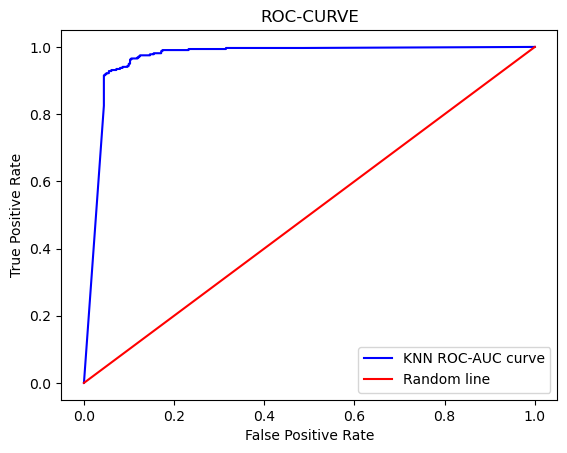

In [51]:
import matplotlib.pyplot as plt
fpr,tpr,threshoulds=roc_curve(y_test,y_predict_prob_yes)
plt.plot(fpr,tpr,color='blue',label='KNN ROC-AUC curve')
plt.plot([0,1],[0,1],color='red',label='Random line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-CURVE')
plt.legend()